### Problem Statement
Shiv Nadar Institution of Eminence is a student centric, multidisciplinary and research focused university offering a wide range of academic programs at the Undergraduate, Masters and Doctoral levels. The University was set up in 2011 by the Shiv Nadar Foundation, a philanthropic foundation established by Mr. Shiv Nadar, founder of HCL. In the NIRF (Government’s National Institutional Ranking Framework), the University has been the youngest institution in the ‘top 100’ overall list.

The university’s Academy of Continuing Education aims to facilitate best-in-class knowledge, practices and skill development offerings to the growing ecosystem of lifetime learners and leaders, both within and outside the university. With distinguished academics as the university’s faculty members and programme instructors, the Academy of Continuing Education offers uniquely crafted programmes that are delivered innovatively, bringing together the best of the university’s rich intellectual resources.  

The university aims to help students prepare for today as well as their future through its unique certification programme in data sciences and business analytics. The collaboration between the Academy of Continuing Education at Shiv Nadar Institution of Eminence and MachineHack hopes to strengthen the data science community in India and pave the way for innovation in business analytics.

About Dataset and problem:
The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement. 

You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 

Dimensions: (to be added later)

Columns: ['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',

                   'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',

                  'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',

                  'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']

 Learn and predict the OUTCOME variable.



In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from imblearn.oversampling import smote

In [8]:
from imblearn.over_sampling import SMOTE

In [4]:
tr=pd.read_csv(r"C:\Users\91882\Downloads\train (4).csv")
ts=pd.read_csv(r"C:\Users\91882\Downloads\test (3).csv")
tr.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [10]:
ts.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack


In [5]:
tr.OUTCOME.value_counts()

0.0    60622
1.0    44378
Name: OUTCOME, dtype: int64

In [11]:
# know about the data types
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [12]:
tr.AGE.value_counts()

40-64    33716
65+      32962
26-39    20018
16-25    18304
Name: AGE, dtype: int64

In [13]:
tr.DRIVING_EXPERIENCE.value_counts()

20-29y    37493
0-9y      33111
10-19y    25101
30y+       9295
Name: DRIVING_EXPERIENCE, dtype: int64

In [14]:
tr.EDUCATION.value_counts()

high school    46590
university     31220
none           27190
Name: EDUCATION, dtype: int64

In [15]:
tr.INCOME.value_counts()

upper class      51271
working class    24454
middle class     14738
poverty          14537
Name: INCOME, dtype: int64

In [16]:
tr.OUTCOME.value_counts()

0.0    60622
1.0    44378
Name: OUTCOME, dtype: int64

In [17]:
tr.VEHICLE_YEAR.value_counts()

before 2015    57511
after 2015     47489
Name: VEHICLE_YEAR, dtype: int64

<AxesSubplot:>

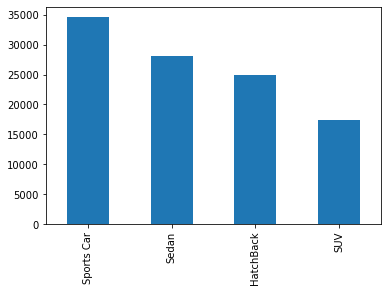

In [18]:
tr.TYPE_OF_VEHICLE.value_counts().plot(kind='bar')

In [19]:
tr.VEHICLE_OWNERSHIP.value_counts()

1.0    86839
0.0    18161
Name: VEHICLE_OWNERSHIP, dtype: int64

In [20]:
tr.CHILDREN.value_counts() 
# need to convert them as categorical data type

1.0    54600
0.0    50400
Name: CHILDREN, dtype: int64

In [21]:
tr.MARRIED.value_counts()# need to convert this also as categorical

1.0    61335
0.0    43665
Name: MARRIED, dtype: int64

In [22]:
tr.SPEEDING_VIOLATIONS.value_counts()
#THIS WILL REAMIN AS numerical data type

0     69163
1     19867
2      8749
3      2990
4      1688
5       911
6       483
7       351
8       260
9       172
10      109
11       87
13       58
12       56
14       25
15       15
16        7
17        4
18        3
20        1
19        1
Name: SPEEDING_VIOLATIONS, dtype: int64

In [23]:
tr.DUIS.value_counts()

0    98246
1     3430
2     1219
3     1069
4      709
5      251
6       76
Name: DUIS, dtype: int64

In [24]:
tr.PAST_ACCIDENTS.value_counts()

0     78853
1     13762
2      6454
3      1749
4      1317
5       906
6       534
7       413
8       340
9       236
10      157
11       92
12       75
13       50
14       38
15       24
Name: PAST_ACCIDENTS, dtype: int64

In [25]:
tr['VEHICLE_OWNERSHIP']

0         0.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
104995    1.0
104996    1.0
104997    1.0
104998    1.0
104999    1.0
Name: VEHICLE_OWNERSHIP, Length: 105000, dtype: float64

In [3]:
# Changing data  types of some of the dimensions on train & test set
tr['VEHICLE_OWNERSHIP']=tr['VEHICLE_OWNERSHIP'].astype('object')
tr['MARRIED']=tr['MARRIED'].astype('object')
tr['CHILDREN']=tr['CHILDREN'].astype('object')
tr['OUTCOME']=tr.OUTCOME.astype('int')

In [4]:
ts['VEHICLE_OWNERSHIP']=ts['VEHICLE_OWNERSHIP'].astype('object')
ts['MARRIED']=ts['MARRIED'].astype('object')
ts['CHILDREN']=ts['CHILDREN'].astype('object')

In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  object 
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  object 
 10  CHILDREN             105000 non-null  object 
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

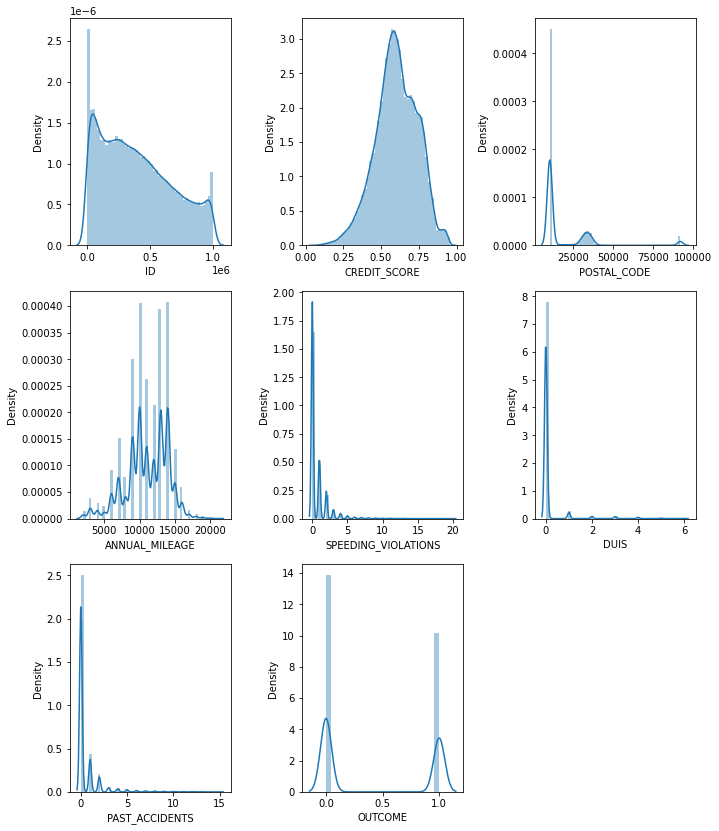

In [36]:
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,15]
a=4
b=3
c=1
for i in tr.select_dtypes(np.number).columns:
    plt.subplot(a,b,c)
    sns.distplot(tr.loc[::,i])
    c=c+1
    plt.xlabel(i)
plt.tight_layout()
plt.show()

In [6]:
tr

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,0.0,0.0,31885,9000.0,2,0,0,0.0,SUV
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,1.0,0.0,32277,10000.0,0,0,0,1.0,Sedan
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,1.0,0.0,34800,11000.0,0,0,0,1.0,Sedan
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,0.0,HatchBack


<AxesSubplot:>

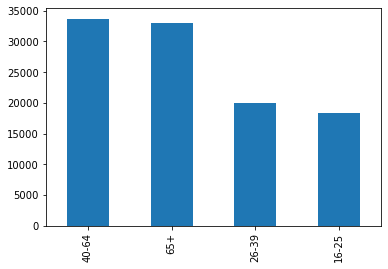

In [7]:
tr.AGE.value_counts().plot(kind='bar')
# So most of them are above 40

<AxesSubplot:>

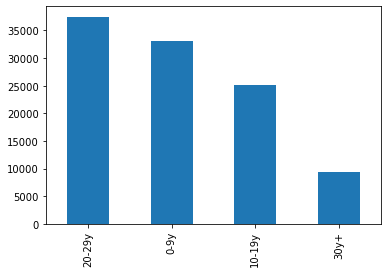

In [10]:
tr.DRIVING_EXPERIENCE.value_counts().plot(kind='bar')
# MOST OF THEM ARE youth 


In [14]:
cat=pd.get_dummies(tr.select_dtypes('object'))
cat

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,...,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,MARRIED_0.0,MARRIED_1.0,CHILDREN_0.0,CHILDREN_1.0,TYPE_OF_VEHICLE_HatchBack,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,0,0,1,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,1,0,1,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,0,0,0,1,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
104996,0,0,1,0,1,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
104997,1,0,0,0,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,1,0
104998,0,0,1,0,1,0,0,0,1,0,...,0,1,1,0,1,0,1,0,0,0


In [7]:
tr.select_dtypes(np.number).drop(c).skew()

CREDIT_SCORE          -0.226358
ANNUAL_MILEAGE        -0.510118
SPEEDING_VIOLATIONS    3.899817
DUIS                   5.608688
PAST_ACCIDENTS         4.345520
OUTCOME                0.313184
dtype: float64

<AxesSubplot:>

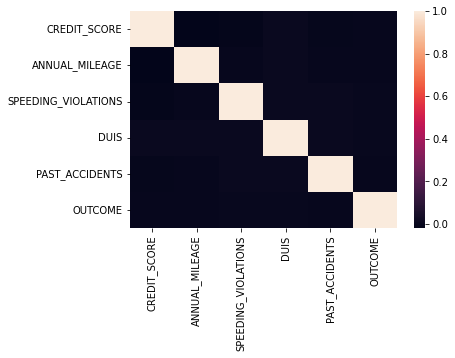

In [11]:
sns.heatmap(tr.drop(['ID','POSTAL_CODE'],axis=1).corr())


NameError: name 'tr' is not defined

In [13]:
tr.corr()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.005688,0.006400,-0.009844,-0.008415,0.001580,0.008127,-0.002383
CREDIT_SCORE,0.005688,1.000000,-0.005986,-0.020313,-0.008752,0.004746,-0.006167,-0.003068
POSTAL_CODE,0.006400,-0.005986,1.000000,0.007323,0.007690,0.007836,0.009485,-0.002801
ANNUAL_MILEAGE,-0.009844,-0.020313,0.007323,1.000000,-0.003679,0.003803,-0.004355,-0.001104
SPEEDING_VIOLATIONS,-0.008415,-0.008752,0.007690,-0.003679,1.000000,0.005753,0.005374,0.000151
DUIS,0.001580,0.004746,0.007836,0.003803,0.005753,1.000000,0.003929,0.000382
PAST_ACCIDENTS,0.008127,-0.006167,0.009485,-0.004355,0.005374,0.003929,1.000000,-0.002343
OUTCOME,-0.002383,-0.003068,-0.002801,-0.001104,0.000151,0.000382,-0.002343,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
tr.select_dtypes(np.number).drop(['ID','POSTAL_CODE','OUTCOME'],axis=1).columns
num=pd.DataFrame(sc.fit_transform(tr.select_dtypes(np.number).drop(['ID','POSTAL_CODE','OUTCOME'],axis=1)),columns=tr.select_dtypes(np.number).drop(['ID','POSTAL_CODE','OUTCOME'],axis=1).columns
)

In [17]:
# TEST DATA PREPRATION
cats=pd.get_dummies(ts.select_dtypes('object'))
ts.select_dtypes(np.number).drop(['ID','POSTAL_CODE'],axis=1).columns
nums=pd.DataFrame(sc.fit_transform(ts.select_dtypes(np.number).drop(['ID','POSTAL_CODE'],axis=1)),columns=ts.select_dtypes(np.number).drop(['ID','POSTAL_CODE'],axis=1).columns)
xtest=pd.concat([nums,cats],axis=1)


In [22]:
from scipy import stats
stats.boxcox(num['DUIS'])

ValueError: Data must be positive.

In [32]:
stats.boxcox(tr.select_dtypes(np.number).drop(['ID','POSTAL_CODE'],axis=1)['CREDIT_SCORE'])

(array([-0.34129545, -0.47849263, -0.15636507, ..., -0.48960423,
        -0.4721455 , -0.48416545]),
 1.2858957110106017)

In [18]:
xtrain=pd.concat([num,cat],axis=1)
ytrain=tr.OUTCOME

In [19]:
xtrain

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,...,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,MARRIED_0.0,MARRIED_1.0,CHILDREN_0.0,CHILDREN_1.0,TYPE_OF_VEHICLE_HatchBack,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,0.259893,-0.020599,-0.488321,-0.219995,-0.391584,0,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
1,-0.915879,-0.693470,-0.488321,-0.219995,-0.391584,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,0
2,1.721500,0.315836,-0.488321,-0.219995,-0.391584,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3,0.582090,-1.702775,0.234394,-0.219995,-0.391584,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4,-0.217238,1.325141,-0.488321,-0.219995,0.321275,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,0.507678,-0.693470,0.957108,-0.219995,-0.391584,0,0,0,1,1,...,0,1,1,0,1,0,0,1,0,0
104996,-0.637327,-0.357035,-0.488321,-0.219995,-0.391584,0,0,1,0,1,...,1,0,0,1,1,0,0,0,1,0
104997,-1.015835,-0.020599,-0.488321,-0.219995,-0.391584,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
104998,-0.859153,-0.357035,-0.488321,-0.219995,-0.391584,0,0,1,0,1,...,0,1,1,0,1,0,1,0,0,0


In [112]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
pred=rf.fit(xtrain,ytrain).predict(xtest)

In [113]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
xtst=pd.DataFrame({'OUTCOME':pred})
xtst.to_csv('olympaid.csv',index=False)

In [53]:
np.log(tr.SPEEDING_VIOLATIONS)

C:\Users\91882\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0             -inf
1             -inf
2             -inf
3         0.000000
4             -inf
            ...   
104995    0.693147
104996        -inf
104997        -inf
104998        -inf
104999        -inf
Name: SPEEDING_VIOLATIONS, Length: 105000, dtype: float64

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
pred=gbm.fit(xtrain,ytrain).predict(xtest)
xtst=pd.DataFrame({'OUTCOME':pred})
xtst.to_csv('olympaid.csv',index=False)

In [123]:
import xgboost as xgb
mo=xgb.XGBClassifier()
xbgpred=mo.fit(xtrain,ytrain).predict(xtest)

NameError: name 'xgbpred' is not defined

In [124]:
xtst=pd.DataFrame({'OUTCOME':xbgpred})
xtst.to_csv('olympaidxgb.csv',index=False)